# TP1 Prétraitement acoustique et Analyse en Composantes Principales

NOM - PRÉNOM : BERNAT Loan

Déposer le notebook sur moodle à la fin de la séance. 

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from canaux24 import canaux
from scipy import linalg

### Prétraitements élémentaires
Définition de la fonction lecture qui permet de récupérer la matrice des observations.

 ### Traitements : 
 ATTENTION
 Procéder par étape en écrivant le code dans une cellule et en traçant le résultat dans la cellule suivante 
 Affichage des matices, des vecteurs, de leur taille ceci afin de vérifier la cohérence des résultats. 


In [148]:
def lecture(classe, nb_fic):
    mat = np.zeros((nb_fic,24))
    for i in range(nb_fic):
        # Formatage du nom de fichier
        dizaine = str(i // 10)
        unite = str(i % 10)
        nomSignal = 'Signal/' + classe + dizaine + unite + '.wav'

        # lecture du fichier
        f, signal = wav.read(nomSignal) # renvoie des signaux reels
        sig_norm = signal / (2**(16-1)-1) # on normalise les signaux
        can = canaux(sig_norm,f)

        # stockage dans la matrice
        mat[i] = can

    return mat

In [149]:
# Lecture des 20 fichiers pour chacune des classes
obsaa = lecture('aa', 100)
obsuu = lecture('uu', 100)
obsii = lecture('ii', 100)
print(obsaa.shape)
print(obsuu.shape)
print(obsii.shape)

(100, 24)
(100, 24)
(100, 24)


In [150]:
R = np.vstack((obsaa, obsuu, obsii))
print(R.shape)

(300, 24)


In [152]:
# En utilisant les fonctions cov et eig, constituer une matrice de passage qui permette de passer 
# de l'espace de dimension 24 généré par la fonction canaux dans un espace à deux dimensions 
# correspondant aux deux composantes principales.
Rcov = np.cov(R.T)
print(Rcov.shape)
[l, V] = linalg.eig(Rcov)
l = np.real(l)
V = np.real(V)

(24, 24)


In [153]:
# Pour cela, 
# 1 - rechercher les deux valeurs propres maximales
lsort = -np.sort(-l)
l1, l2 = lsort[0:2]
print(l1,l2)

2406.1889355703147 368.9289266912595


In [162]:
# 2-  prendre les vercteurs propres correspondants
indice1 = np.where(l==l1)[0][0]
indice2 = np.where(l==l2)[0][0]

V1 = V[:,indice1]
V2 = V[:,indice2]

M = np.array([V1,V2])
print(M.shape)

(2, 24)


In [165]:
# 3- projeter R dans ce nouvel espace
X = np.dot(R,M.T)
print(X.shape)

(300, 2)


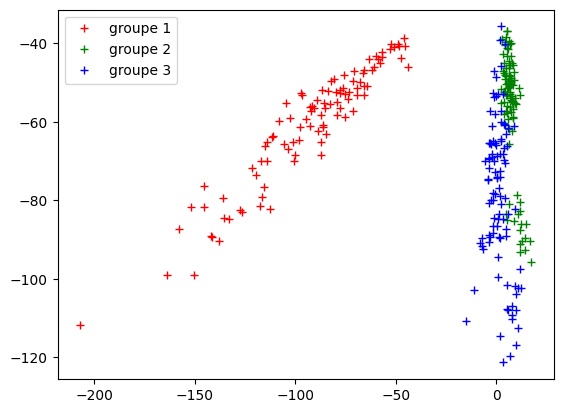

In [166]:
# 4- et effectuer un tracé
# Afficher les nuages de points de chacune des classes de sons sur une même figure en les différenciant 
# par des couleurs ou une forme de tracé de points différentes ; Mettre une légende.
plt.plot(X[0:100,0],X[0:100,1],"r+", label="groupe 1")
plt.plot(X[100:200,0],X[100:200,1],"g+", label="groupe 2")
plt.plot(X[200:300,0],X[200:300,1],"b+", label="groupe 3")
plt.legend()

In [159]:
# Utilisez les deux vecteurs propres les moins représentatifs pour la matrice de passage, 
# que devient la représentation des nuages ? Est-ce qu'une discrimination linéaire est possible ?
lnul1, lnul2 = lsort[len(lsort)-2:len(lsort)]
indice_nul1 = np.where(l==lnul1)[0][0]
indice_nul2 = np.where(l==lnul2)[0][0]

Vnul1 = V[:,indice_nul1]
Vnul2 = V[:,indice_nul2]

Mnul = np.array([Vnul1,Vnul2])

Xnul = np.dot(R,Mnul.T)

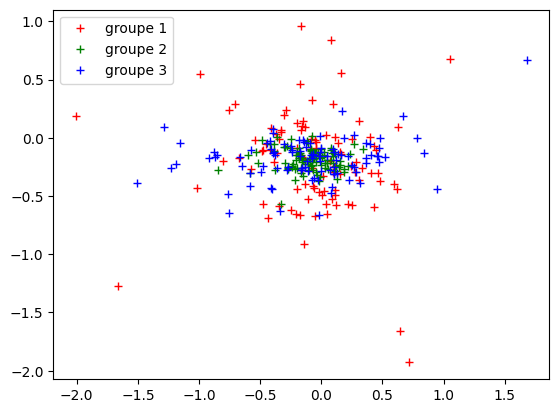

In [160]:
plt.plot(Xnul[0:100,0],Xnul[0:100,1],"r+", label="groupe 1")
plt.plot(Xnul[100:200,0],Xnul[100:200,1],"g+", label="groupe 2")
plt.plot(Xnul[200:300,0],Xnul[200:300,1],"b+", label="groupe 3")
plt.legend()

### Généralisation
Réaliser le même traitement avec tous les fichiers (100) des 3 classes. Est-ce toujours séparable ?
Effectuer le même traitement sur les 10 voyelles et commenter les résultats... Ajouter les cellules nécessaires.